In [3]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv', low_memory=False)

## Feature Selection and some preprocessing 
For the KNN Algorithm, a set of features stored in the features variable were selected and manipulated to observe their influence on the prediction algorithm. These include: Latitude, Longitude, SOG, COG and TH. 

The dataset was split into two uneven parts to be used by the algorithm. 70% of the data was randomly split for training and 30% for testing the model.

A random_state variable was set here to '42'. This number does not have any significant impact on the model but rather setting random_state to a given value does guarantee that the output for the split will always be same.

In order to properly fit the training data for the KNN Regressor, all timestamp values to be used for training had to be converted to datetime objects first and then their durations (in hours) were calculated to produce a float value which can be passed to the fit method. 



In [5]:
features = ['Latitude', 'Longitude', 'SOG', 'COG','TH']
training_features = df[features]
df['EndTime'] = pd.to_datetime(df['EndTime'], errors='raise')
df['StartTime'] = pd.to_datetime(df['StartTime'], errors = 'raise')
df['time'] = pd.to_datetime(df['time'], errors = 'raise')
df['duration_hours'] = (df['EndTime'] - df['time']).dt.total_seconds() / 3600
target = df['duration_hours']

In [6]:
features_train, features_test, target_train, target_test = train_test_split(training_features, target, test_size = 0.3, train_size = 0.7, random_state = 42)

## KNN Regressor tuning
It was observed that, the higher the number of nearest neighbors selected for the regressor, the larger the error calculated was. 

This can be observed by changing the values of the n_neighbors variable and observing the graph as well as the mean absolute error which was calculated.

In [7]:
knnRegressor = KNeighborsRegressor(n_neighbors=5)
knnRegressor.fit(features_train, target_train)

KNeighborsRegressor()

In [8]:
y_predict = knnRegressor.predict(features_test)

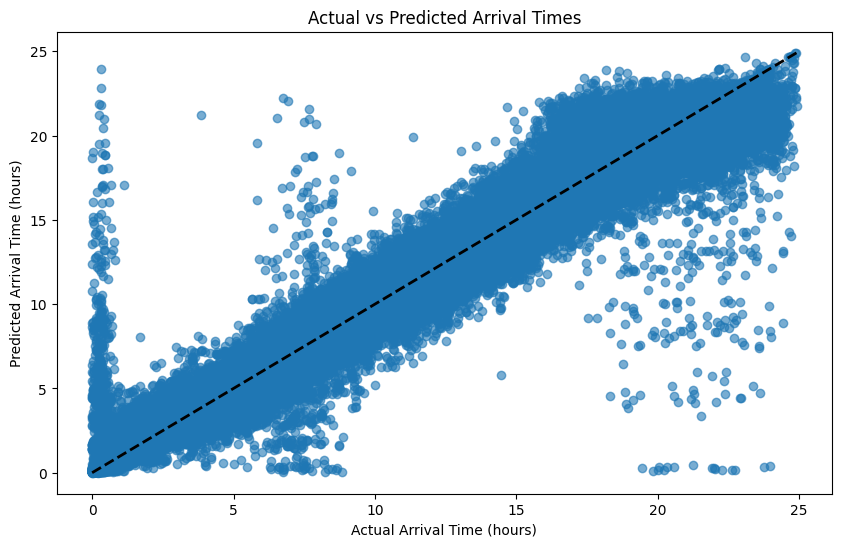

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_predict, alpha=0.6)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times')
plt.show()


In [17]:
mse = mean_absolute_error(target_test, y_predict)
print("Mean absolute Error for KNN with 5 neighbors: " , mse)

msqe = mean_squared_error(target_test, y_predict)
print("Mean square Error for KNN with 5 neighbors: " , msqe)

Mean absolute Error for KNN with 5 neighbors:  1.358574611296208
Mean square Error for KNN with 5 neighbors:  5.579438258532985


## KNN with 100 Neighbors

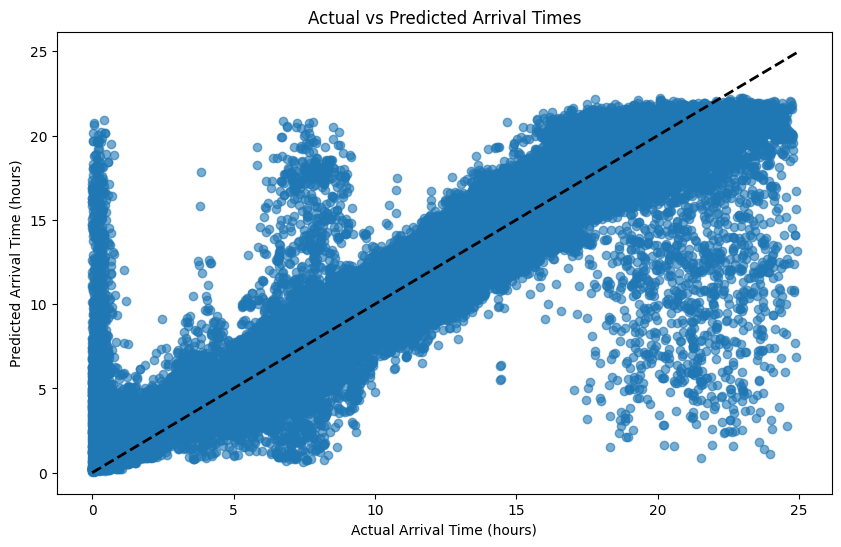

In [12]:
knnRegressor = KNeighborsRegressor(n_neighbors=100)
knnRegressor.fit(features_train, target_train)
y_predict = knnRegressor.predict(features_test)
plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_predict, alpha=0.6)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times')
plt.show()

In [13]:
mse100 = mean_absolute_error(target_test, y_predict)
print("Mean absolute Error for KNN with 100 neighbors: " , mse100)

Mean absolute Error for KNN with 100 neighbors:  1.02623135925003


## KNN with a 1000 neighbors

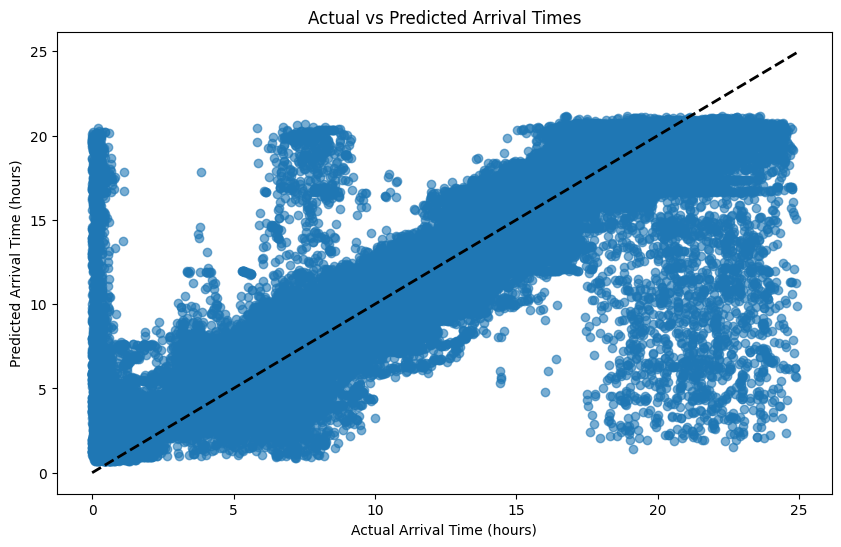

In [14]:
knnRegressor = KNeighborsRegressor(n_neighbors=1000)
knnRegressor.fit(features_train, target_train)
y_predict = knnRegressor.predict(features_test)
plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_predict, alpha=0.6)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Time (hours)')
plt.ylabel('Predicted Arrival Time (hours)')
plt.title('Actual vs Predicted Arrival Times')
plt.show()

In [15]:
mse1000 = mean_absolute_error(target_test, y_predict)
print("Mean absolute Error for KNN with 100 neighbors: " , mse1000)

Mean absolute Error for KNN with 100 neighbors:  1.358574611296208
